In [1]:
import os
import cv2
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Load Sample Image

In [81]:
sample_img_1  = '../DataSet/Valid/DCM/700.dcm'
sample_mask_1 = '../DataSet/Valid/Label/700.png'
# 649
sample_img_2  = '../DataSet/Valid/DCM/698.dcm'
sample_mask_2 = '../DataSet/Valid/Label/698.png'

In [82]:
img_1 = sitk.ReadImage(sample_img_1)
img_arr_1 = sitk.GetArrayFromImage(img_1)[0]
mask_1 = cv2.imread(sample_mask_1, 0)

img_2 = sitk.ReadImage(sample_img_2)
img_arr_2 = sitk.GetArrayFromImage(img_2)[0]
mask_2 = cv2.imread(sample_mask_2, 0)

# Visualize Sample Image

In [83]:
def overlay_mask_on_img(img, mask):
    overlay_img = (img - img.min()) / (img.max() - img.min())
    overlay_img = (overlay_img * 255).astype(np.uint8)
    overlay_img = np.repeat(overlay_img[...,None], 3, -1)
    overlay_img[mask != 0] = [255,0,0]
    
    return overlay_img

In [84]:
overlay_img_1 = overlay_mask_on_img(img_arr_1, mask_1)
overlay_img_2 = overlay_mask_on_img(img_arr_2, mask_2)

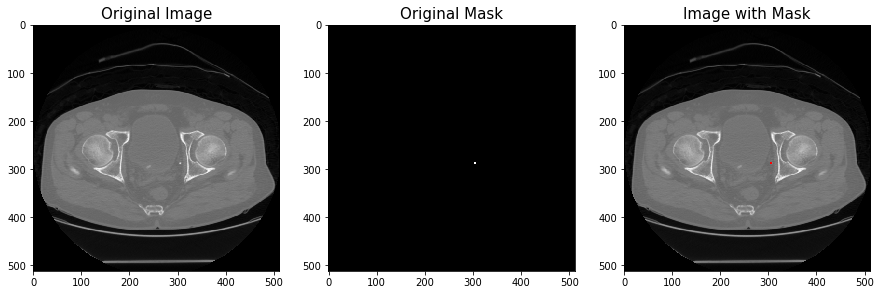

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_1, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_1)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

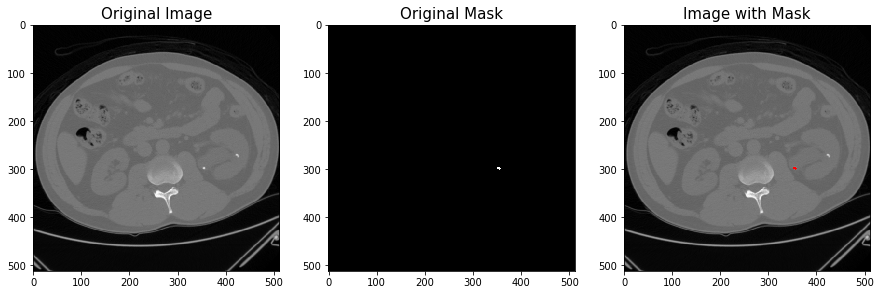

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(mask_2, 'gray')
axes[1].set_title("Original Mask", fontsize=15)

axes[2].imshow(overlay_img_2)
axes[2].set_title("Image with Mask", fontsize=15)

plt.show()

# HU Windowing

In [85]:
def image_windowing(img, w_min=0, w_max=200):
    img_w = img.copy()

    img_w[img_w < w_min] = w_min
    img_w[img_w > w_max] = w_max

    return img_w

In [86]:
img_w_1 = image_windowing(img_arr_1, -100, 300)
img_w_2 = image_windowing(img_arr_2, -100, 300)

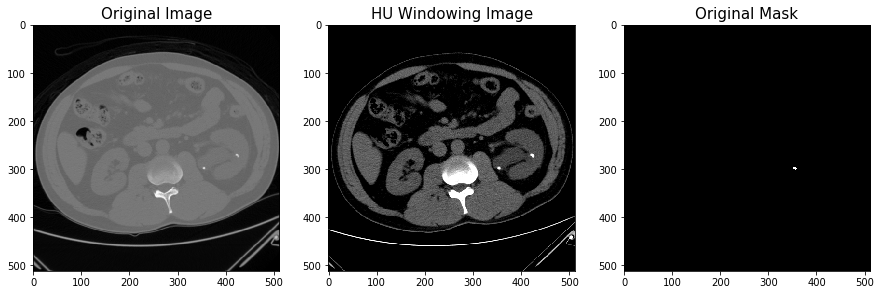

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_2, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_2, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

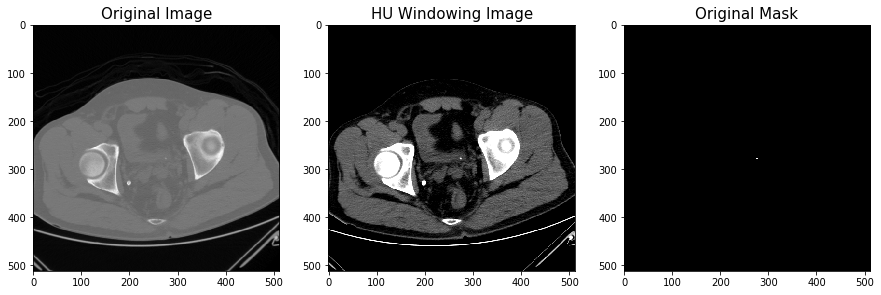

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_1, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_1, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_1, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()

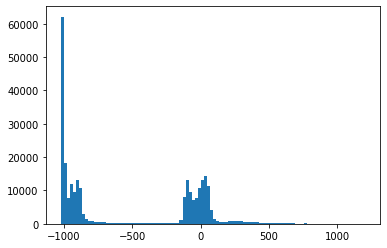

In [78]:
plt.hist(img_arr_1.reshape(-1), bins = 100)
plt.show()

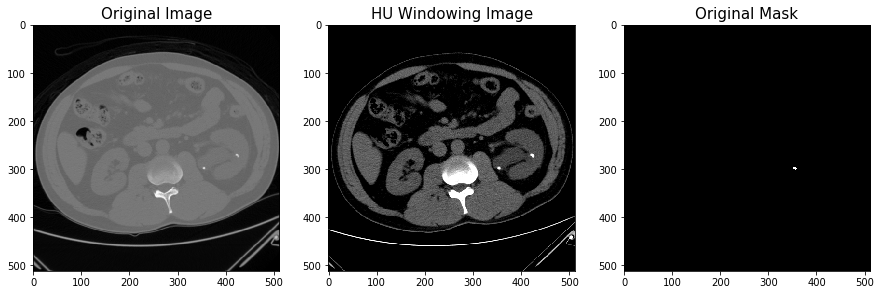

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))

axes[0].imshow(img_arr_2, 'gray')
axes[0].set_title("Original Image", fontsize=15)

axes[1].imshow(img_w_2, 'gray')
axes[1].set_title("HU Windowing Image", fontsize=15)

axes[2].imshow(mask_2, 'gray')
axes[2].set_title("Original Mask", fontsize=15)

plt.show()